# Assignment B2 

In [3]:
import pandas as pd

## Transactions

In [4]:
transactions = pd.read_csv('transactions_sample.csv')
transactions.shape

(600000, 5)

In [3]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [5]:
min_date = transactions['t_dat'].min()
max_date = transactions['t_dat'].max()
print(f"Date range: {min_date} - {max_date}")

Date range: 2018-09-20 - 2018-10-01


In [5]:
transactions['price'].sum()

17921.728745762684

In [6]:
transactions['price'].mean()

0.029869547909534996

In [7]:
transactions['sales_channel_id'].value_counts()

2    391582
1    208418
Name: sales_channel_id, dtype: int64

In [8]:
result = transactions.groupby('sales_channel_id')['price'].sum()
result.index = ['online', 'offline']
result

online      5440.732508
offline    12480.996237
Name: price, dtype: float64

In [9]:
results = transactions.groupby('sales_channel_id')['price'].mean()
results.index = ['online', 'offline']
results

online     0.026105
offline    0.031873
Name: price, dtype: float64

In [10]:
x = 541518023

total_price = transactions[transactions['article_id'] == x]['price'].sum()
print(total_price)

1.818694915254236


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   t_dat             600000 non-null  object 
 1   customer_id       600000 non-null  object 
 2   article_id        600000 non-null  int64  
 3   price             600000 non-null  float64
 4   sales_channel_id  600000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 22.9+ MB


In [12]:
unique_customers = transactions['customer_id'].nunique()
unique_customers

141333

In [13]:
total_customers = transactions['customer_id'].count()
total_customers

600000

In [14]:
total_customers - unique_customers

458667

In [15]:
transactions['customer_id'].value_counts()

75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b    169
2039c3a9cdd14183aae75ea2b5e52956e1b5d22b5ff4aa27da504c4f03ac8cd2    108
2fdf822dbaad2b983b37e651a982bba24352a92c8a5c4c75be25c771f2af6d13    103
a81e0b7657a090198d8138c95fae7db1218305b97bb8fd3f42b8d8e1b6d5b846    100
ef196ddee4c886fd11ec06fadbbc5e7d554c32a0d0bbaab239953bc22d07a4a5     89
                                                                   ... 
df4972b8fdb9dba7cfe4b0c8264f1b49b1743aa63f3c1bf03338f458534fa413      1
62c312b5196e19c6fe0088ba4d919559189ad8e79be2f51bf6651efc4584f2e9      1
df46732be88090b653a139818004942201377d9040ca0acdaed2e1cc38c21940      1
62c8a4c52f356a0c9b4de63f86f84df211154e606963bfc29384180f38761fa0      1
4e5bfd2cf4c80a98264a98a46dce0acae7e911d7624ff1b18eed75d506399abc      1
Name: customer_id, Length: 141333, dtype: int64

In [16]:
repeat_customers = transactions['customer_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].sum()
repeat_customers

565686

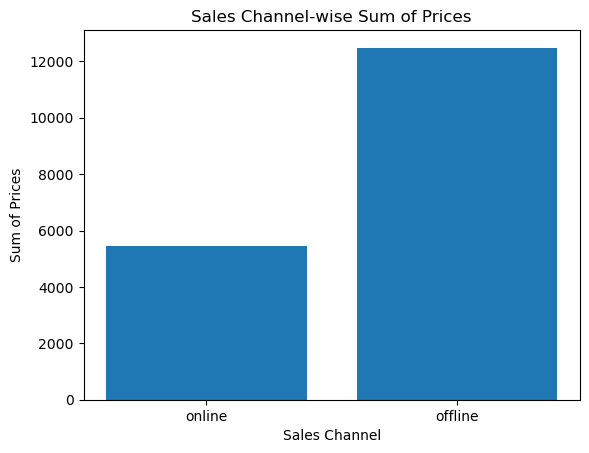

In [18]:
import matplotlib.pyplot as plt

result = transactions.groupby('sales_channel_id')['price'].sum()
result.index = ['online', 'offline']

plt.bar(result.index, result.values)
plt.title('Sales Channel-wise Sum of Prices')
plt.xlabel('Sales Channel')
plt.ylabel('Sum of Prices')
plt.show()

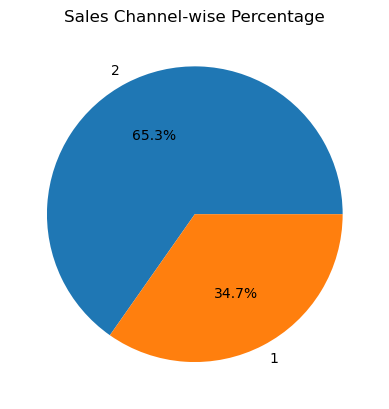

In [19]:
sales_channel_count = transactions['sales_channel_id'].value_counts()

plt.pie(sales_channel_count, labels=sales_channel_count.index, autopct='%1.1f%%')
plt.title('Sales Channel-wise Percentage')
plt.show()

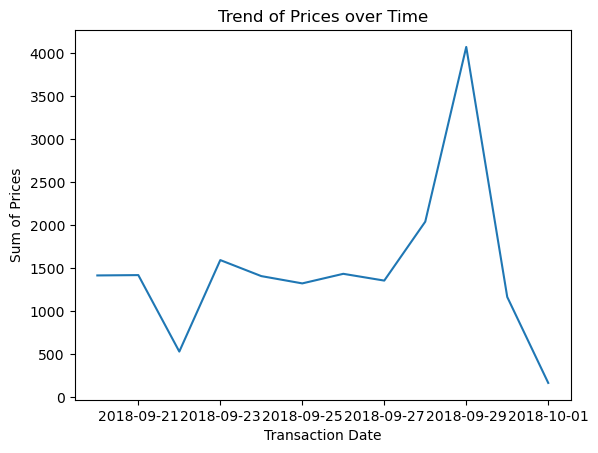

In [22]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions_by_date = transactions.groupby('t_dat')['price'].sum()

plt.plot(transactions_by_date.index, transactions_by_date.values)
plt.title('Trend of Prices over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Sum of Prices')
plt.show()

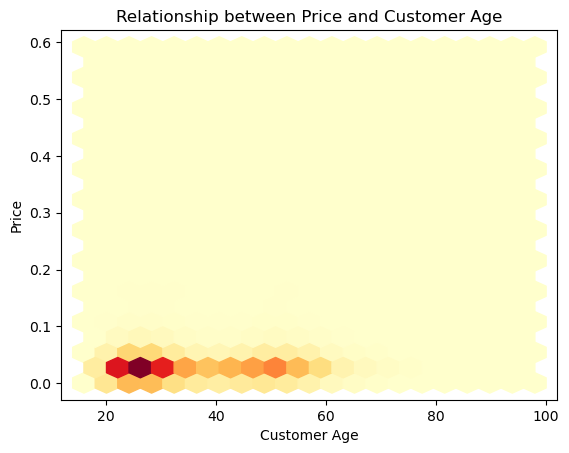

In [28]:
customers = pd.read_csv('customers.csv')
merged_data = pd.merge(transactions, customers, on='customer_id')

plt.hexbin(merged_data['age'], merged_data['price'], gridsize=20, cmap='YlOrRd')
plt.title('Relationship between Price and Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Price')
plt.show()

## Customers

In [29]:
customers = pd.read_csv('customers.csv')
customers.shape

(1371980, 7)

In [30]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [31]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [32]:
active_customers = customers['Active'].value_counts()
print(active_customers)

1.0    464404
Name: Active, dtype: int64


In [41]:
percent_active_customers = (active_customers / total_customers) * 100
print(percent_active_customers)

33.849181474948615


In [33]:
club_members = customers['club_member_status'].value_counts()
print(club_members)

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


In [43]:
percent_club_members = (club_members / total_customers) * 100
print(percent_club_members)

ACTIVE        92.748509
PRE-CREATE     6.775609
LEFT CLUB      0.034038
Name: club_member_status, dtype: float64


In [34]:
avg_age = customers['age'].mean()
print(avg_age)

36.386964565794


In [35]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_groups = pd.cut(customers['age'], age_bins)
age_distribution = age_groups.value_counts(sort=False)
print(age_distribution)

(0, 20]      126779
(20, 30]     512397
(30, 40]     210991
(40, 50]     216880
(50, 60]     209856
(60, 70]      63363
(70, 80]      14741
(80, 90]       1035
(90, 100]        77
Name: age, dtype: int64


In [45]:
news_customers = customers['fashion_news_frequency'].count()
print(news_customers)

1355971


In [46]:
percent_news_customers = (news_customers / total_customers) * 100
print(percent_news_customers)

98.83314625577633


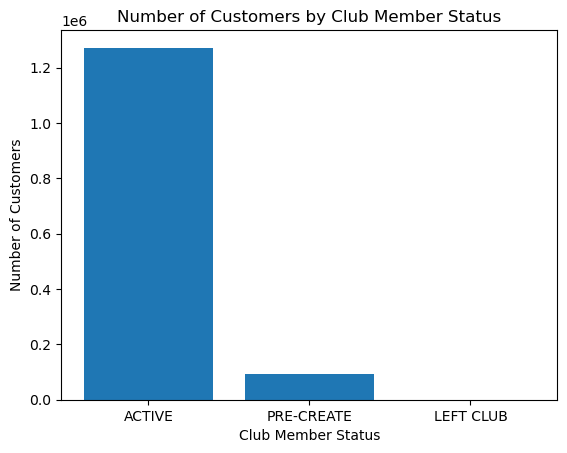

In [47]:
club_member_status = customers['club_member_status'].value_counts()
plt.bar(club_member_status.index, club_member_status.values)
plt.title('Number of Customers by Club Member Status')
plt.xlabel('Club Member Status')
plt.ylabel('Number of Customers')
plt.show()

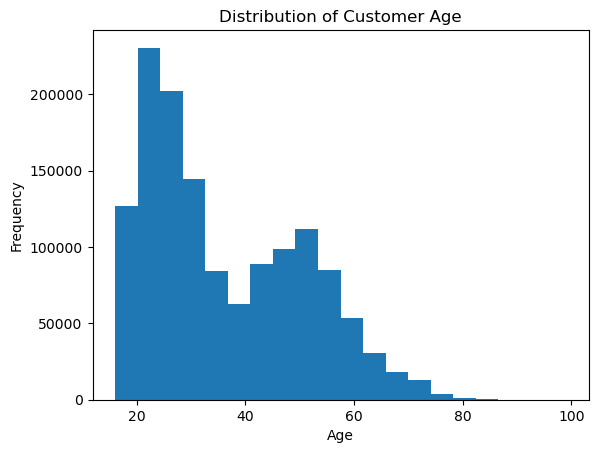

In [48]:
plt.hist(customers['age'], bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

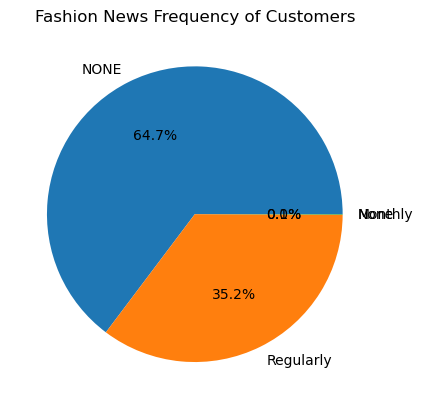

In [49]:
fashion_news_frequency = customers['fashion_news_frequency'].value_counts()
plt.pie(fashion_news_frequency.values, labels=fashion_news_frequency.index, autopct='%1.1f%%')
plt.title('Fashion News Frequency of Customers')
plt.show()

## Articles

In [4]:
articles = pd.read_csv('articles.csv')
articles.shape

(105542, 25)

In [6]:
unique_colors = articles["perceived_colour_master_name"].unique()
print(unique_colors)

['Black' 'White' 'Beige' 'Grey' 'Blue' 'Pink' 'Lilac Purple' 'Red' 'Mole'
 'Orange' 'Metal' 'Brown' 'Turquoise' 'Yellow' 'Khaki green' 'Green'
 'undefined' 'Unknown' 'Yellowish Green' 'Bluish Green']


In [3]:
unique_colors = articles["colour_group_name"].unique()
print(unique_colors)

['Black' 'White' 'Off White' 'Light Beige' 'Beige' 'Grey' 'Light Blue'
 'Light Grey' 'Dark Blue' 'Dark Grey' 'Pink' 'Dark Red' 'Greyish Beige'
 'Light Orange' 'Silver' 'Gold' 'Light Pink' 'Dark Pink' 'Yellowish Brown'
 'Blue' 'Light Turquoise' 'Yellow' 'Greenish Khaki' 'Dark Yellow'
 'Other Pink' 'Dark Purple' 'Red' 'Transparent' 'Dark Green' 'Other Red'
 'Turquoise' 'Dark Orange' 'Other' 'Orange' 'Dark Beige' 'Other Yellow'
 'Light Green' 'Other Orange' 'Purple' 'Light Red' 'Light Yellow' 'Green'
 'Light Purple' 'Dark Turquoise' 'Other Purple' 'Bronze/Copper'
 'Other Turquoise' 'Other Green' 'Other Blue' 'Unknown']


In [7]:
unique_name = articles["garment_group_name"].unique()
print(unique_name)

['Jersey Basic' 'Under-, Nightwear' 'Socks and Tights' 'Jersey Fancy'
 'Accessories' 'Trousers Denim' 'Outdoor' 'Shoes' 'Swimwear' 'Knitwear'
 'Shirts' 'Trousers' 'Dressed' 'Shorts' 'Dresses Ladies' 'Skirts'
 'Special Offers' 'Blouses' 'Unknown' 'Woven/Jersey/Knitted mix Baby'
 'Dresses/Skirts girls']


In [7]:
unique_name = articles["index_group_name"].unique()
print(unique_name)

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']


In [9]:
unique_name = articles["department_name"].unique()
print(unique_name)

['Jersey Basic' 'Clean Lingerie' 'Tights basic' 'Baby basics'
 'Casual Lingerie' 'Jersey' 'EQ & Special Collections' 'Hair Accessories'
 'Other items' 'Baby Nightwear' 'Men Sport Woven' 'Men Sport Bottoms'
 'Kids Boy Denim' 'Shopbasket Socks' 'Socks' 'UW'
 'Young Girl Jersey Basic' 'Jacket Street' 'Belts' 'Divided Shoes'
 'Swimwear' 'Underwear Jersey' 'Basic 1' 'Tops Knitwear DS'
 'Men Sport Acc' 'Kids Boy Jersey Basic' 'Young Girl UW/NW' 'Shirt'
 'Nightwear' 'Trouser' 'Small Accessories' 'Sunglasses' 'Gloves/Hats'
 'Knit & Woven' 'Basics' 'Accessories' 'Jewellery' 'Jersey Fancy DS'
 'Trousers DS' 'Bags' 'Blazer S&T' 'Knitwear' 'Woven bottoms' 'Shorts'
 'Dresses DS' 'Expressive Lingerie' 'Kids Girl UW/NW'
 'Young Boy Jersey Basic' 'Kids Girl S&T' 'Young Girl S&T'
 'Shoes / Boots inactive from s5' 'Nursing' 'Jersey Fancy' 'Shoes'
 'Functional Lingerie' 'Men Sport Tops' 'Other Accessories'
 'Young Boy Trouser' 'Outdoor/Blazers DS' 'Mama Lingerie' 'Socks Bin'
 'Denim Other Garments' 'Ever

In [54]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [55]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [56]:
total_products = articles['product_code'].nunique()
print(f"Total number of unique products: {total_products}")

Total number of unique products: 47224


In [57]:
total_product_types = articles['product_type_no'].nunique()
print(f"Total number of unique product types: {total_product_types}")

Total number of unique product types: 132


In [58]:
total_colour_groups = articles['colour_group_name'].nunique()
print(f"Total number of unique colour groups: {total_colour_groups}")

Total number of unique colour groups: 50


In [59]:
avg_perceived_colour_value = articles['perceived_colour_value_id'].mean()
print(f"Average perceived colour value: {avg_perceived_colour_value}")

Average perceived colour value: 3.206183320384302


In [60]:
total_garment_groups = articles['garment_group_name'].nunique()
print(f"Total number of unique garment groups: {total_garment_groups}")

Total number of unique garment groups: 21


In [68]:
top_product_groups = articles['product_group_name'].value_counts().head(10)
print("Top 10 most popular product groups:")
print(top_product_groups)

Top 10 most popular product groups:
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Shoes                  5283
Swimwear               3127
Socks & Tights         2442
Nightwear              1899
Unknown                 121
Name: product_group_name, dtype: int64


In [72]:
products_by_section = articles['section_name'].value_counts()
print("Number of products by section:")
print(products_by_section)

Number of products by section:
Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                        

In [61]:
product_counts_by_department = articles.groupby('department_name')['product_code'].count()
print(product_counts_by_department)

department_name
AK Bottoms                 90
AK Dresses & Outdoor       87
AK Other                   33
AK Tops Jersey & Woven     42
AK Tops Knitwear           28
                         ... 
Young Girl Shoes          287
Young Girl Swimwear       175
Young Girl Trouser        408
Young Girl UW/NW          499
Young boy Swimwear        114
Name: product_code, Length: 250, dtype: int64


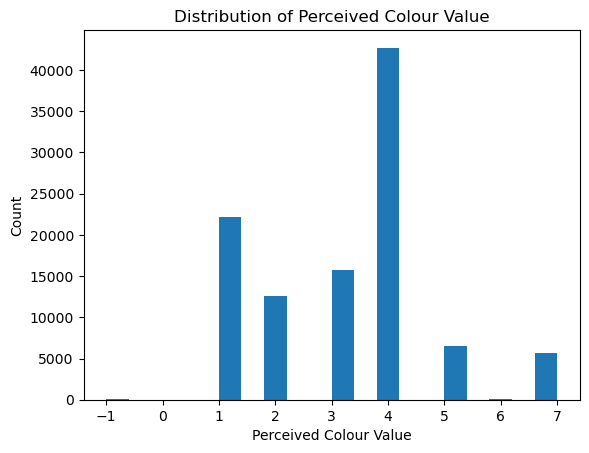

In [65]:
plt.hist(articles['perceived_colour_value_id'], bins=20)
plt.title('Distribution of Perceived Colour Value')
plt.xlabel('Perceived Colour Value')
plt.ylabel('Count')
plt.show()

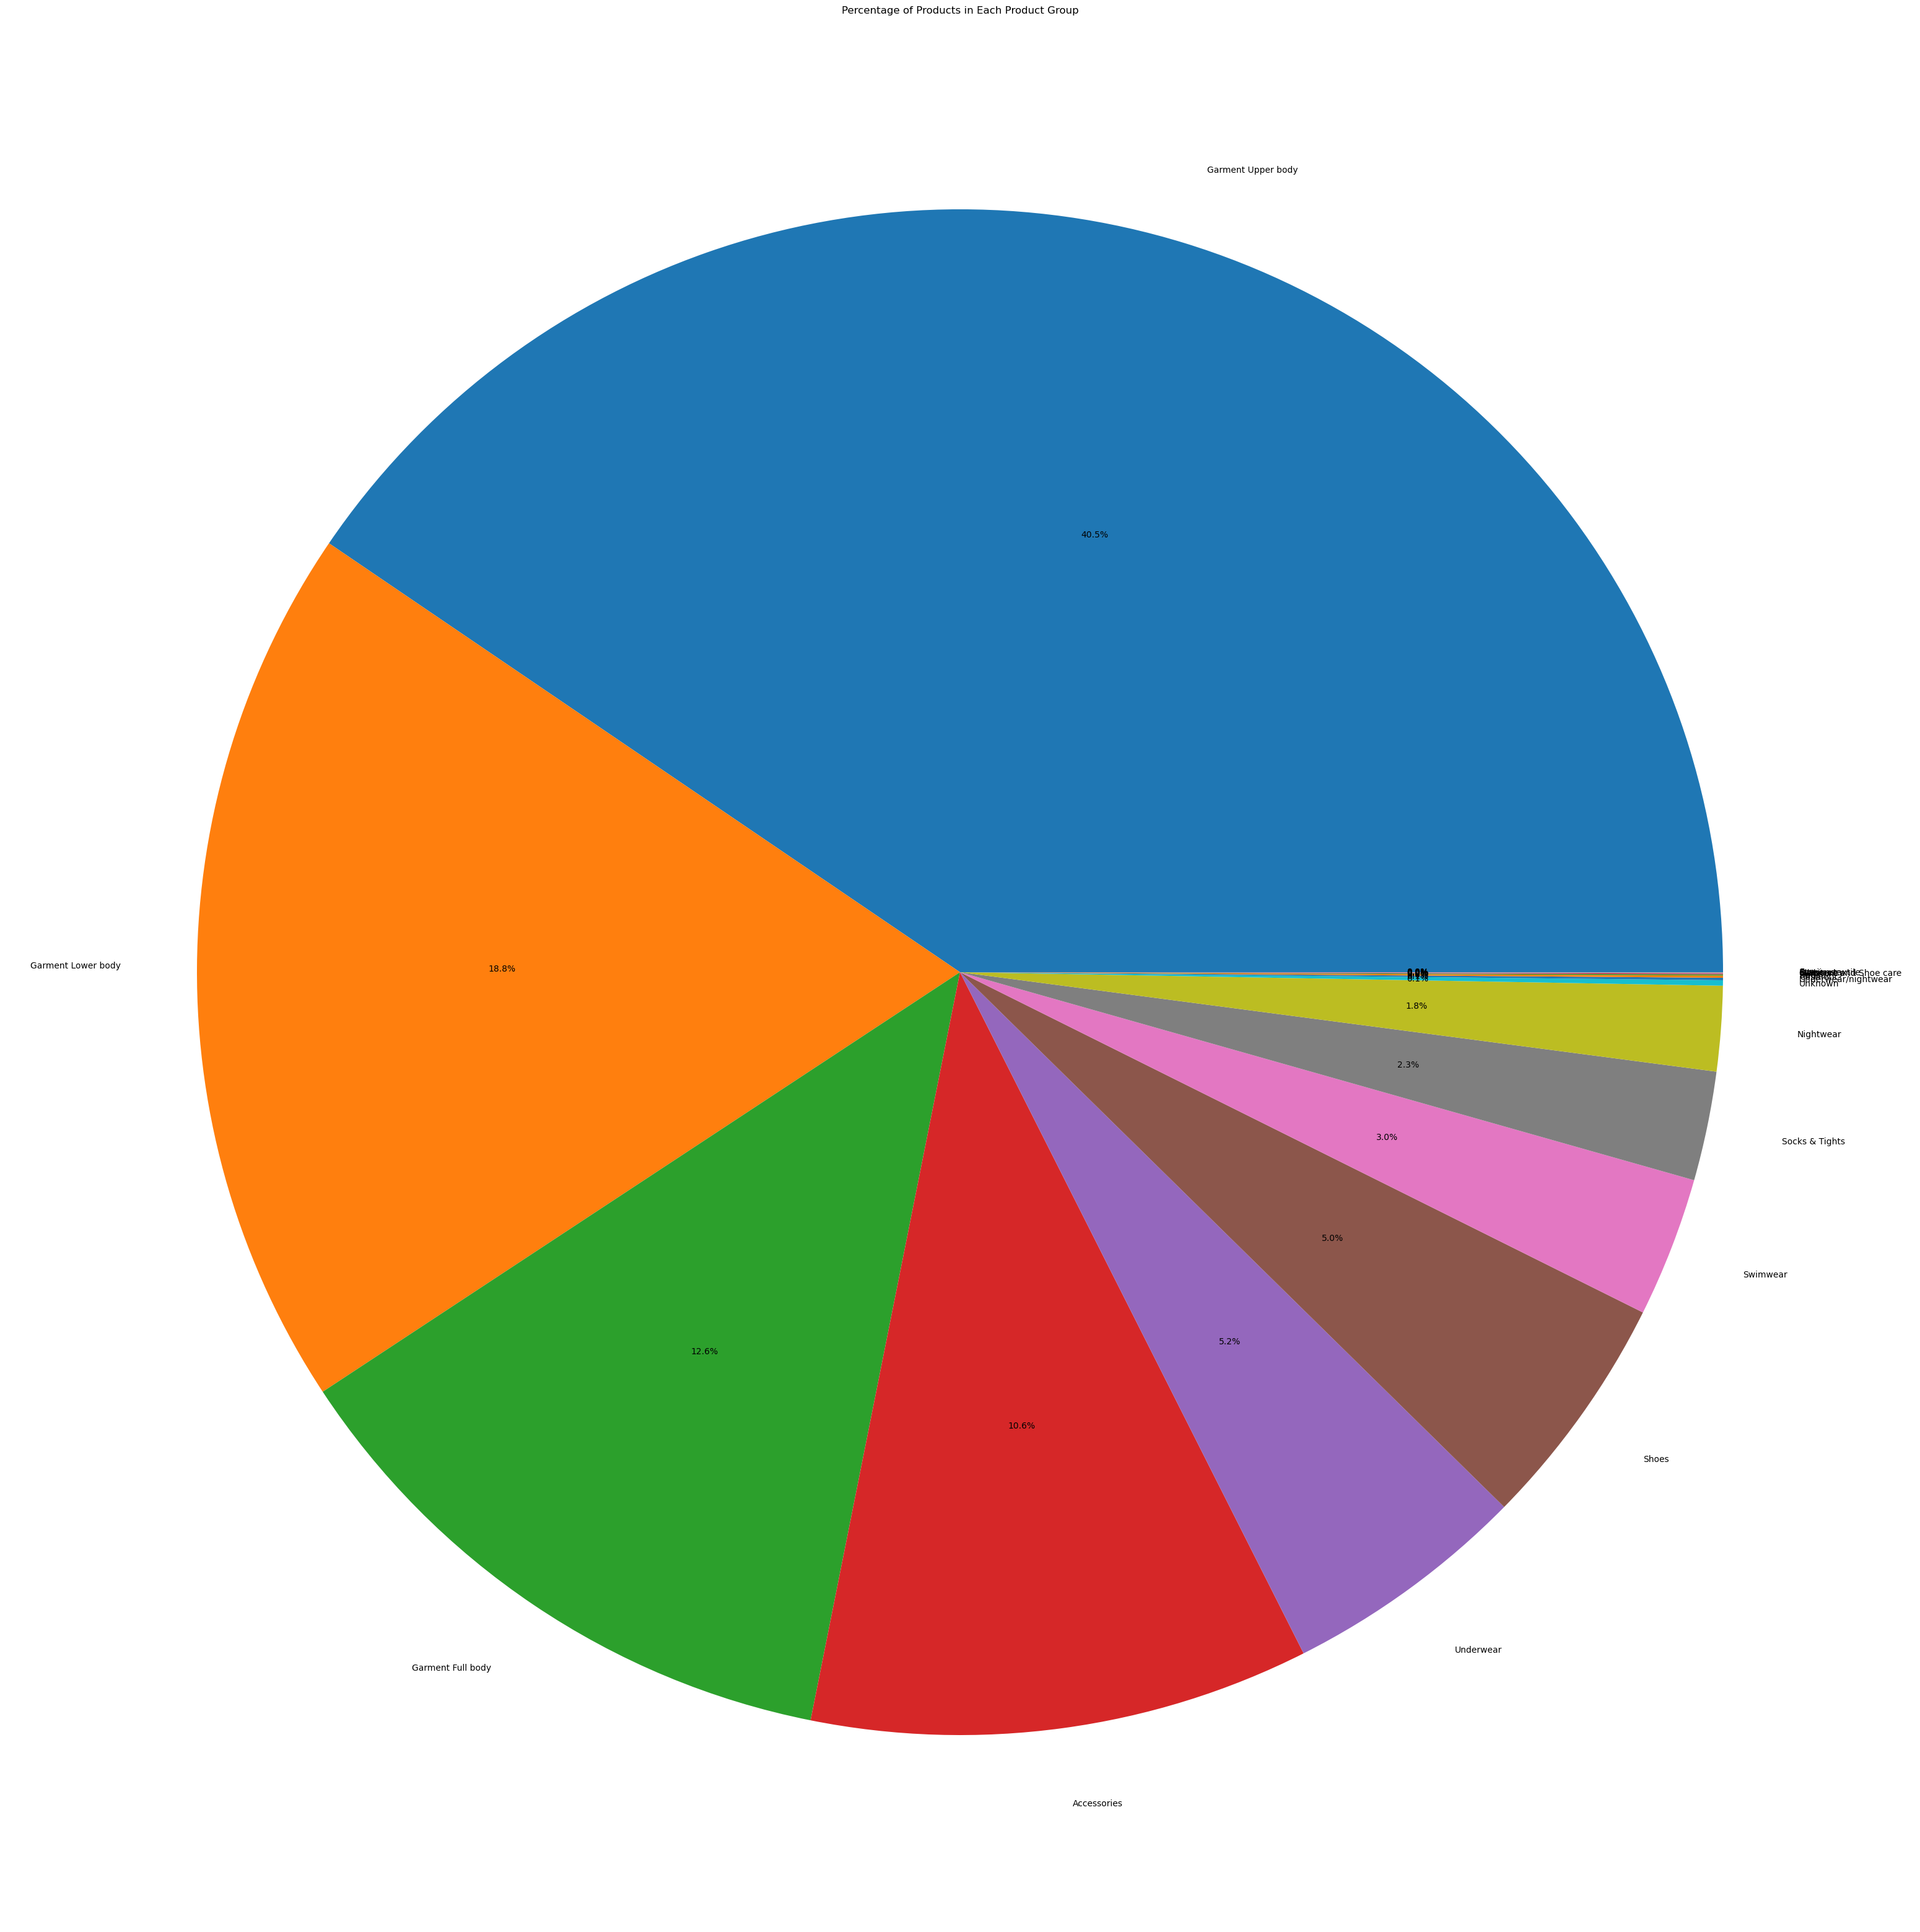

In [84]:
product_counts_by_group = articles['product_group_name'].value_counts()
plt.figure(figsize=(50, 40))
plt.pie(product_counts_by_group.values, labels=product_counts_by_group.index, autopct='%1.1f%%')
plt.title('Percentage of Products in Each Product Group')
plt.show()

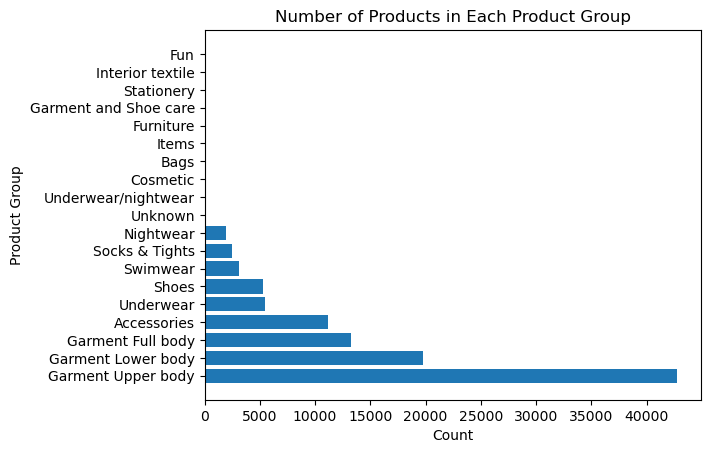

In [85]:
# the pie chart was very squished, so I put it in a horizontal bar plot instead
product_counts_by_group = articles['product_group_name'].value_counts()
plt.barh(product_counts_by_group.index, product_counts_by_group.values)
plt.title('Number of Products in Each Product Group')
plt.xlabel('Count')
plt.ylabel('Product Group')
plt.show()